# Seaborn.jl examples

* Author: 黒木 玄
* Date: 2019-03-21

violinplot, swarmplotのそれぞれとboxplotを比較してみた.

以下のtwitterでのスレッドも参照:

* https://twitter.com/genkuroki/status/1108586973562843136
* https://twitter.com/genkuroki/status/1108703680503570432

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#boxplot,-violinplot,-swarmplot-の比較" data-toc-modified-id="boxplot,-violinplot,-swarmplot-の比較-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>boxplot, violinplot, swarmplot の比較</a></span><ul class="toc-item"><li><span><a href="#単純な比較" data-toc-modified-id="単純な比較-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>単純な比較</a></span></li><li><span><a href="#sarmplotにboxplotを重ねてみた" data-toc-modified-id="sarmplotにboxplotを重ねてみた-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>sarmplotにboxplotを重ねてみた</a></span></li><li><span><a href="#さらに-violinplot-で-cut=0,-bw=0.1,-0.05-などとしてみた" data-toc-modified-id="さらに-violinplot-で-cut=0,-bw=0.1,-0.05-などとしてみた-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>さらに violinplot で cut=0, bw=0.1, 0.05 などとしてみた</a></span></li></ul></li><li><span><a href="#公式サイトのexamples" data-toc-modified-id="公式サイトのexamples-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>公式サイトのexamples</a></span><ul class="toc-item"><li><span><a href="#violinplot" data-toc-modified-id="violinplot-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>violinplot</a></span></li><li><span><a href="#swarmplot" data-toc-modified-id="swarmplot-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>swarmplot</a></span></li><li><span><a href="#boxplot" data-toc-modified-id="boxplot-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>boxplot</a></span></li></ul></li></ul></div>

In [1]:
using Seaborn: Seaborn
const sns = Seaborn

# issue?
sns.@delegate despine

using PyCall
const pd = pyimport("pandas")

using Distributions
using Statistics
using Random: seed!

## boxplot, violinplot, swarmplot の比較

### 単純な比較

std(first  sample) = 

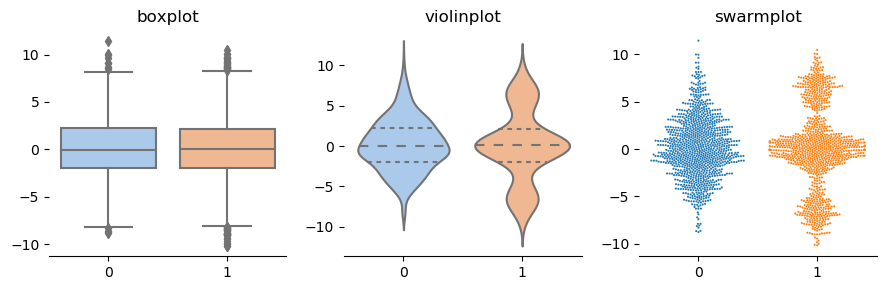

3.2134179655166135
std(second sample) = 4.4335909115663075


In [2]:
seed!(2019)
n = 2^10

dist0 = Normal(0, 3.3)
Y0 = rand(dist0, n)

dist1 = MixtureModel(
    [Normal(-6.5, 1.5), Normal(0.0, 1.4), Normal(6.5, 1.5)], 
    [0.22, 0.56, 0.22]
)
Y1 = rand(dist1, n)

println("std(first  sample) = ", std(Y0))
println("std(second sample) = ", std(Y1))

sns.figure(figsize=(9,3))

sns.subplot(131)
sns.title("boxplot")
sns.boxplot(data=[Y0, Y1], palette="pastel")
despine(left=true)

sns.subplot(132)
sns.title("violinplot")
sns.violinplot(data=[Y0, Y1], inner="quartile", palette="pastel")
despine(left=true)

sns.subplot(133)
sns.title("swarmplot")
sns.swarmplot(data=[Y0, Y1], size=1.5)
despine(left=true)

sns.tight_layout()

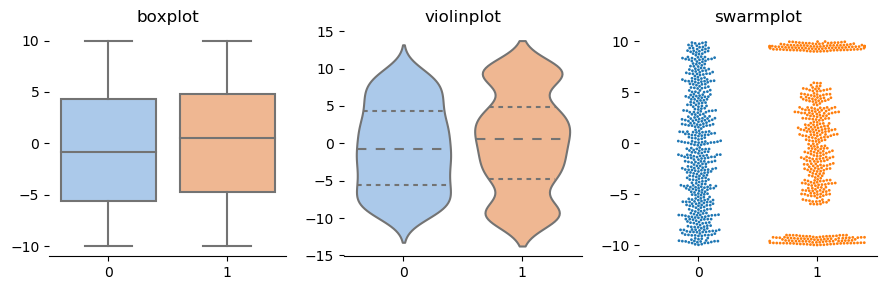

std(first  sample) = 5.715486884410333
std(second sample) = 6.539527618105898


In [3]:
seed!(2019)
n = 2^9

dist0 = Uniform(-10, 10)
Y0 = rand(dist0, n)

dist1 = MixtureModel(
    [Uniform(-10,-9), Uniform(-6,6), Uniform(9,10)], 
    [0.2, 0.6, 0.2]
)
Y1 = rand(dist1, n)

println("std(first  sample) = ", std(Y0))
println("std(second sample) = ", std(Y1))

sns.figure(figsize=(9,3))

sns.subplot(131)
sns.title("boxplot")
sns.boxplot(data=[Y0, Y1], palette="pastel")
despine(left=true)

sns.subplot(132)
sns.title("violinplot")
sns.violinplot(data=[Y0, Y1], inner="quartile", palette="pastel")
despine(left=true)

sns.subplot(133)
sns.title("swarmplot")
sns.swarmplot(data=[Y0, Y1], size=2)
despine(left=true)

sns.tight_layout()

### sarmplotにboxplotを重ねてみた

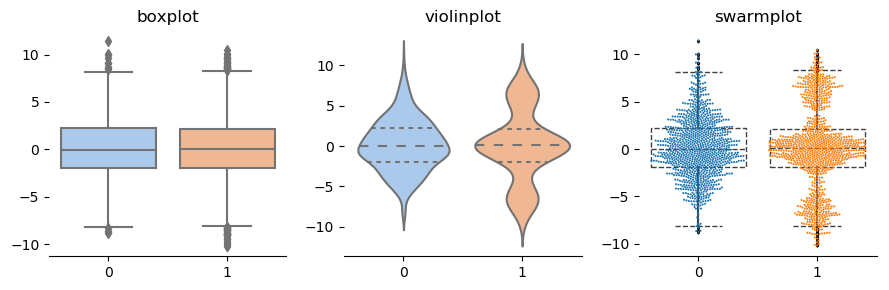

std(first  sample) = 3.2134179655166135
std(second sample) = 4.4335909115663075


In [4]:
seed!(2019)
n = 2^10

dist0 = Normal(0, 3.3)
Y0 = rand(dist0, n)

dist1 = MixtureModel(
    [Normal(-6.5, 1.5), Normal(0.0, 1.4), Normal(6.5, 1.5)], 
    [0.22, 0.56, 0.22]
)
Y1 = rand(dist1, n)

println("std(first  sample) = ", std(Y0))
println("std(second sample) = ", std(Y1))

sns.figure(figsize=(9,3))

sns.subplot(131)
sns.title("boxplot")
sns.boxplot(data=[Y0, Y1], palette="pastel")
despine(left=true)

sns.subplot(132)
sns.title("violinplot")
sns.violinplot(data=[Y0, Y1], inner="quartile", palette="pastel")
despine(left=true)

sns.subplot(133)
sns.title("swarmplot")
sns.swarmplot(data=[Y0, Y1], size=1.5)
sns.boxplot(data=[Y0, Y1], 
    medianprops=Dict("linestyle"=>"--", "linewidth"=>1),
    boxprops=Dict("facecolor"=>"None", "linestyle"=>"--", "linewidth"=>1),
    whiskerprops=Dict("linestyle"=>"-", "linewidth"=>1.5),
    capprops=Dict("linestyle"=>"--", "linewidth"=>1),
    flierprops=Dict("markeredgecolor"=>"k", "markersize"=>1.5))
despine(left=true)

sns.tight_layout()

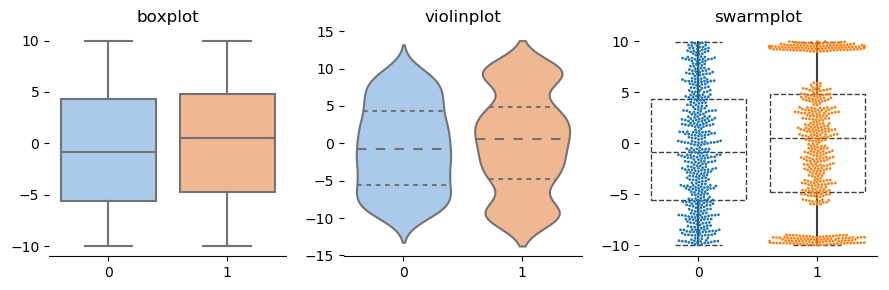

std(first  sample) = 5.715486884410333
std(second sample) = 6.539527618105898


In [5]:
seed!(2019)
n = 2^9

dist0 = Uniform(-10, 10)
Y0 = rand(dist0, n)

dist1 = MixtureModel(
    [Uniform(-10,-9), Uniform(-6,6), Uniform(9,10)], 
    [0.2, 0.6, 0.2]
)
Y1 = rand(dist1, n)

println("std(first  sample) = ", std(Y0))
println("std(second sample) = ", std(Y1))

sns.figure(figsize=(9,3))

sns.subplot(131)
sns.title("boxplot")
sns.boxplot(data=[Y0, Y1], palette="pastel")
despine(left=true)

sns.subplot(132)
sns.title("violinplot")
sns.violinplot(data=[Y0, Y1], inner="quartile", palette="pastel")
despine(left=true)

sns.subplot(133)
sns.title("swarmplot")
sns.swarmplot(data=[Y0, Y1], size=2)
sns.boxplot(data=[Y0, Y1], 
    medianprops=Dict("linestyle"=>"--", "linewidth"=>1),
    boxprops=Dict("facecolor"=>"None", "linestyle"=>"--", "linewidth"=>1),
    whiskerprops=Dict("linestyle"=>"-", "linewidth"=>1.5),
    capprops=Dict("linestyle"=>"--", "linewidth"=>1),
    flierprops=Dict("markeredgecolor"=>"k", "markersize"=>2))
despine(left=true)

sns.tight_layout()

### さらに violinplot で cut=0, bw=0.1, 0.05 などとしてみた

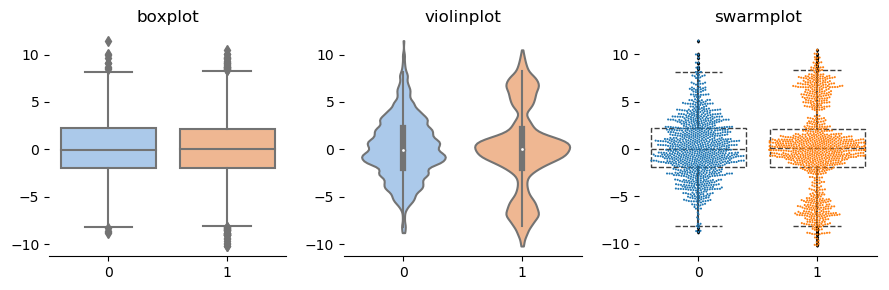

std(first  sample) = 3.2134179655166135
std(second sample) = 4.4335909115663075


In [6]:
seed!(2019)
n = 2^10

dist0 = Normal(0, 3.3)
Y0 = rand(dist0, n)

dist1 = MixtureModel(
    [Normal(-6.5, 1.5), Normal(0.0, 1.4), Normal(6.5, 1.5)], 
    [0.22, 0.56, 0.22]
)
Y1 = rand(dist1, n)

println("std(first  sample) = ", std(Y0))
println("std(second sample) = ", std(Y1))

sns.figure(figsize=(9,3))

sns.subplot(131)
sns.title("boxplot")
sns.boxplot(data=[Y0, Y1], palette="pastel")
despine(left=true)

sns.subplot(132)
sns.title("violinplot")
sns.violinplot(data=[Y0, Y1], palette="pastel", cut=0, bw=0.1)
despine(left=true)

sns.subplot(133)
sns.title("swarmplot")
sns.swarmplot(data=[Y0, Y1], size=1.5)
sns.boxplot(data=[Y0, Y1], 
    medianprops=Dict("linestyle"=>"--", "linewidth"=>1),
    boxprops=Dict("facecolor"=>"None", "linestyle"=>"--", "linewidth"=>1),
    whiskerprops=Dict("linestyle"=>"-", "linewidth"=>1.5),
    capprops=Dict("linestyle"=>"--", "linewidth"=>1),
    flierprops=Dict("markeredgecolor"=>"k", "markersize"=>1.5))
despine(left=true)

sns.tight_layout()

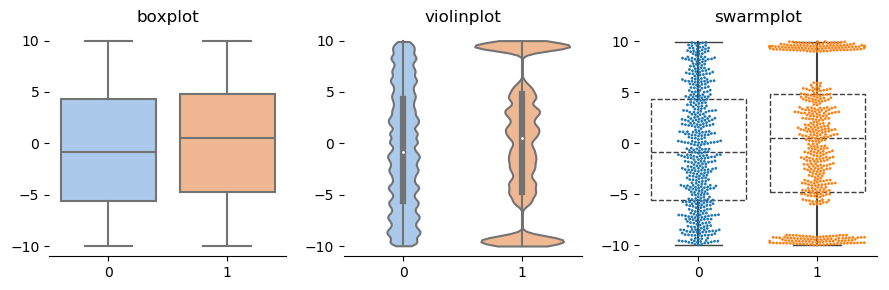

std(first  sample) = 5.715486884410333
std(second sample) = 6.539527618105898


In [7]:
seed!(2019)
n = 2^9

dist0 = Uniform(-10, 10)
Y0 = rand(dist0, n)

dist1 = MixtureModel(
    [Uniform(-10,-9), Uniform(-6,6), Uniform(9,10)], 
    [0.2, 0.6, 0.2]
)
Y1 = rand(dist1, n)

println("std(first  sample) = ", std(Y0))
println("std(second sample) = ", std(Y1))

sns.figure(figsize=(9,3))

sns.subplot(131)
sns.title("boxplot")
sns.boxplot(data=[Y0, Y1], palette="pastel")
despine(left=true)

sns.subplot(132)
sns.title("violinplot")
sns.violinplot(data=[Y0, Y1], palette="pastel", cut=0, bw=0.05)
despine(left=true)

sns.subplot(133)
sns.title("swarmplot")
sns.swarmplot(data=[Y0, Y1], size=2)
sns.boxplot(data=[Y0, Y1], 
    medianprops=Dict("linestyle"=>"--", "linewidth"=>1),
    boxprops=Dict("facecolor"=>"None", "linestyle"=>"--", "linewidth"=>1),
    whiskerprops=Dict("linestyle"=>"-", "linewidth"=>1.5),
    capprops=Dict("linestyle"=>"-", "linewidth"=>1),
    flierprops=Dict("markeredgecolor"=>"k", "markersize"=>2))
despine(left=true)

sns.tight_layout()

## 公式サイトのexamples

### violinplot

http://seaborn.pydata.org/examples/grouped_violinplots.html

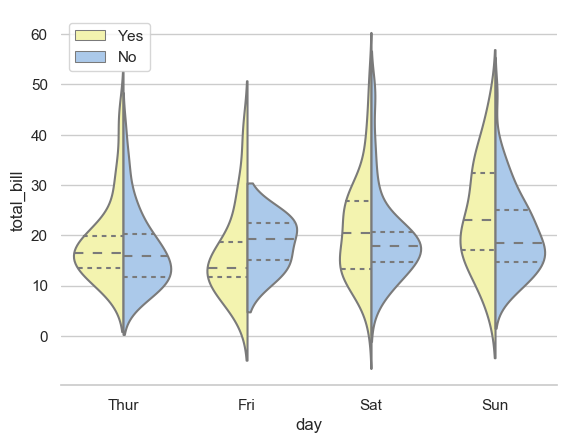

In [8]:
sns.set(style="whitegrid", palette="pastel", color_codes=true)

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="day", y="total_bill", hue="smoker",
               split=true, inner="quart",
               palette=Dict("Yes"=>"y", "No"=>"b"),
               data=tips)
sns.legend(loc="upper left")
despine(left=true);

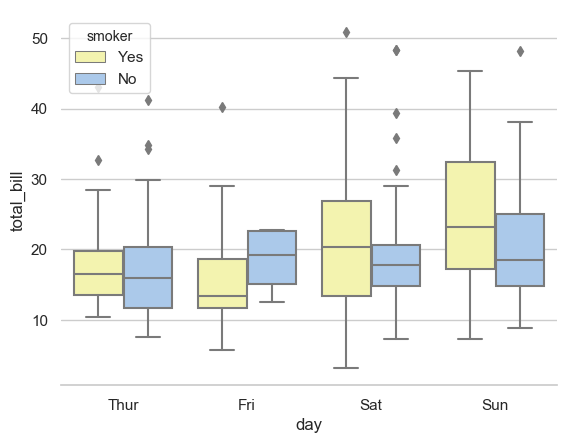

In [9]:
sns.boxplot(x="day", y="total_bill", hue="smoker",
               palette=Dict("Yes"=>"y", "No"=>"b"),
               data=tips)
despine(left=true);

### swarmplot

http://seaborn.pydata.org/examples/scatterplot_categorical.html

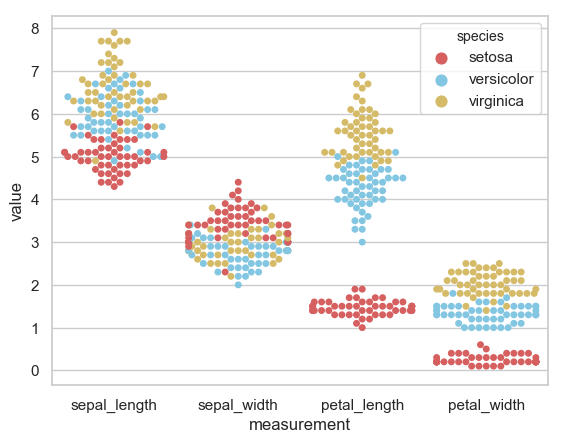

In [10]:
sns.set(style="whitegrid", palette="muted")

# Load the example iris dataset
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species",
              palette=["r", "c", "y"], data=iris);

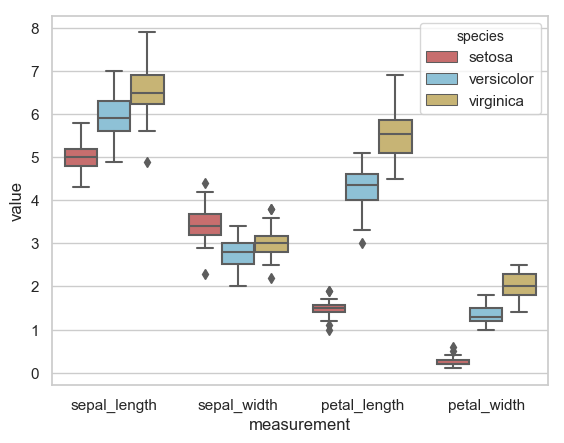

In [11]:
sns.boxplot(x="measurement", y="value", hue="species",
              palette=["r", "c", "y"], data=iris);

### boxplot

http://seaborn.pydata.org/examples/grouped_boxplot.html

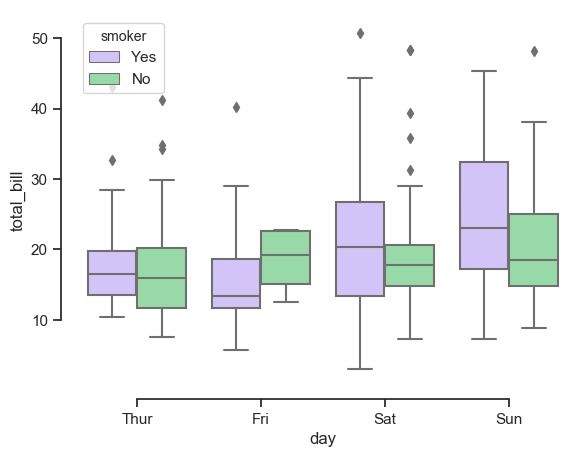

In [12]:
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
despine(offset=10, trim=true)

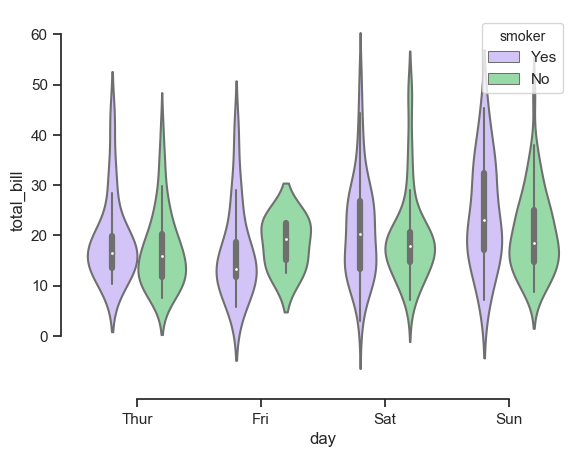

In [13]:
sns.violinplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
despine(offset=10, trim=true)

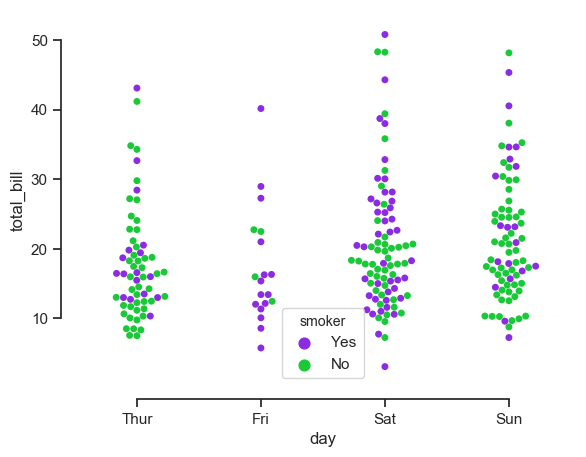

In [14]:
sns.set(style="ticks", palette="bright")

sns.swarmplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
despine(offset=10, trim=true)

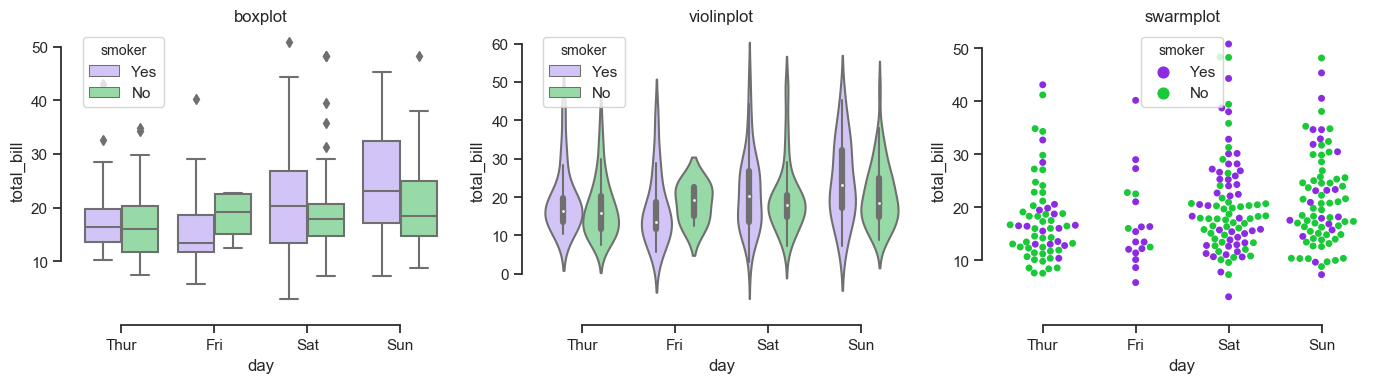

In [15]:
sns.figure(figsize=(14, 4))

sns.subplot("131")
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.title("boxplot")
despine(offset=10, trim=true)

sns.subplot("132")
sns.set(style="ticks", palette="pastel")
sns.violinplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.title("violinplot")
despine(offset=10, trim=true)

sns.subplot("133")
sns.set(style="ticks", palette="bright")
sns.swarmplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.title("swarmplot")
despine(offset=10, trim=true)

sns.tight_layout()